# Small world-ness, scale freedom, and modularity analyses

Set up environment.

In [6]:
import networkx as nx
from tqdm import tqdm
import statistics as st
import pandas as pd
from math import log # is yet the natural logarithm ln
import seaborn as sns

Build an undirected network for papers and one for journals

In [2]:
papers_network = nx.read_gml("../gml format networks/undirected_papers_network.gml")
journals_network = nx.read_gml("../gml format networks/undirected_journals_network.gml")

## Small worldness

The two values $\sigma$ and $\omega$ allow to determine whether a network is charcaterized by a small-world effect or not.

The small world coefficient $\sigma$ is computed as:
</br>
$$\sigma= \dfrac{\dfrac{C}{C_r}}{\dfrac{L}{L_r}}$$
</br>

Where $C$ is the clustering coefficient of our network and $C_r$ is the clusetering coefficient of an equivalent random graph, while $L$ and $L_r$ are the average shortest path values for our network and an equivalent random graph, respectively.

A graph is commonly classified as small-world if $\sigma \gt 1$.

The small world coefficient $\omega$ is computed as:
</br>
$$\omega=\dfrac{L_r}{L}-\dfrac{C}{C_l}$$


Where $C$ and $L$ are respectively the average clustering coefficient and average shortest path length of our network, while $L_r$ is the average shortest path length of an equivalent random graph and $C_l$ is the average clustering coefficient of an equivalent lattice graph.

$\omega$ measures if our graph is like a lattice or a random graph. Negative values mean that our network is similar to a lattice, whereas positive values mean that it is more likely to be similar to a random graph. Values close to 0 mean that it has small-world characteristics.

### 1) Network of papers 

#### 1.$\sigma$) Computing the sigma value

##### Computing the clustering coefficient $C$ and the average path length $L$ of our network.

In [ ]:
# Compute C
C = nx.average_clustering(papers_network)
print("C = ", C)

In [ ]:
# Compute L
L_list = list() # list of L values
for N in (papers_network.subgraph(n).copy() for n in nx.connected_components(papers_network)): # for each connected component of the network (N) 
    L_list.append(nx.average_shortest_path_length(N)) # compute L and append it to the list

if len(L_list) > 1:
    computable_L_list = [L for L in L_list if L != 1.0] # remove the 0 values
    if len(computable_L_list) == 1:
        L = computable_L_list[0]
    else:
        L = st.mean(computable_L_list)
else:
    L = L_list[0]

print("L = ", L)

##### Retrieve the number of edges $E$ and nodes $n$ in the network, and the probability $p$ of finding an edge between two random nodes in the graph.

In [ ]:
E = papers_network.nx.number_of_edges()
n = papers_network.nx.number_of_nodes()
p = (2*E)/((n-1)*n)

print("E = ", E)
print("n = ", n)
print("p = ", p)

##### Create a random graph

##### I) ER with nodes and probability <span style="color:red">!!!!! NON È UN ER RANDOM GRAPH !!!!</span>

Now, we compute ten <i>ER random graphs</i> with respect to the probability value just obtained.

In [ ]:
i = 0
er_clusters_list = list()
er_shortest_list = list()
for network in tqdm(range(0, 11)):
    G = nx.erdos_renyi_graph(n,p)
    er_clusters_list.append(nx.average_clustering(G))
    er_shortest_list.append(nx.average_shortest_path_length(G))
    i+=1

Print the average clustering coefficient and the average shortest path of the ER random graphs.

In [ ]:
L_r = st.mean(er_shortest_list)
C_r = st.mean(er_clusters_list)
print("Average clustering coefficient: ", st.mean(er_clusters_list), "standard deviation: ", st.stdev(er_clusters_list))
print("Average shortest path: ", st.mean(er_shortest_list), "standard deviation: ", st.stdev(er_shortest_list))

#### Compute the Sigma value

In [ ]:
N = C/C_r
D = L/L_r
sigma_value = N/D
print(N, D, sigma_value)

##### II) ER with nodes and edges

Now, we compute ten <i>ER random graphs</i> with respect to the number of nodes and edges.

In [ ]:
i=0
er_clusters_list = list()
er_shortest_list = list()
for iteration in tqdm(range(0, 11)):
    G = nx.gnm_random_graph(n,E)
    er_clusters_list.append(nx.average_clustering(G))
    er_shortest_list.append(nx.average_shortest_path_length(G))
    i+=1

100%|██████████| 11/11 [05:36<00:00, 30.57s/it]


Print the average clustering coefficient and the average shortest path of the ER random graphs.

In [ ]:
L_r = st.mean(er_shortest_list)
C_r = st.mean(er_clusters_list)
print("Average clustering coefficient: ", st.mean(er_clusters_list), "standard deviation: ", st.stdev(er_clusters_list))
print("Average shortest path: ", st.mean(er_shortest_list), "standard deviation: ", st.stdev(er_shortest_list))

Average clustering coefficient:  0.002382841486418715 standard deviation:  0.0001124815647467052
Average shortest path:  3.5873621528786774 standard deviation:  0.0005222689601180479


#### Compute the Sigma value

In [ ]:
N = C/C_r
D = L/L_r
sigma_value = N/D
print(N, D, sigma_value)

##### L'AFFERMAZIONE SOTTO È DA VEDERE, ANCHE SE È QUELLO CHE CI ASPETTIAMO
<span style="color:red">In the end, the sigma value remains pretty similar for both the ways of computing ER random graphs.</span>

### 2) Network of journals 

In [15]:
L_list = list() # list of L values
for N in (journals_network.subgraph(n).copy() for n in nx.connected_components(journals_network)): # for each connected component of the network (N) 
    L_list.append(nx.average_shortest_path_length(N)) # compute L and append it to the list

if len(L_list) > 1:
    computable_L_list = [L for L in L_list if L != 1.0] # remove the 0 values
    if len(computable_L_list) == 1:
        L = computable_L_list[0]
    else:
        L = st.mean(computable_L_list)
else:
    L = L_list[0]

print("L = ", L)

[2.989171113335879]
L =  2.989171113335879
L =  2.989171113335879


In [5]:
# Compute C
C = nx.average_clustering(journals_network)
print("C = ", C)

C =  0.33300640976926094


#### Retrieve the number of edges $E$ and of nodes $n$ in the network.

In [6]:
E = journals_network.number_of_edges()
n = journals_network.number_of_nodes()
print("E = ", E)
print("n = ", n)

E =  39100
n =  5661


#### Compute the probability $p$ of finding an edge between two random nodes in the graph.

In [7]:
p = (E)/(((n-1)*n)/2)
print("p = ", p)

p =  0.002440603147316928


#### Create a random graph

##### I) ER with nodes and probability

Now, we compute ten <i>ER random graphs</i> with respect to the probability value just obtained.

In [8]:
i=0
er_clusters_list = list()
er_shortest_list = list()
for iteration in tqdm(range(0, 11)):
    G = nx.erdos_renyi_graph(n,p)
    er_clusters_list.append(nx.average_clustering(G))
    er_shortest_list.append(nx.average_shortest_path_length(G))
    i+=1

100%|██████████| 11/11 [16:19<00:00, 89.04s/it]


Print the average clustering coefficient and the average shortest path of the ER random graphs.

In [9]:
L_r = st.mean(er_shortest_list)
C_r = st.mean(er_clusters_list)
print("Average clustering coefficient: ", st.mean(er_clusters_list), "standard deviation: ", st.stdev(er_clusters_list))
print("Average shortest path: ", st.mean(er_shortest_list), "standard deviation: ", st.stdev(er_shortest_list))

Average clustering coefficient:  0.002521754530160568 standard deviation:  0.00012973608362599
Average shortest path:  3.589043371521027 standard deviation:  0.003637616392217271


In [10]:
N = C/C_r
D = L/L_r
sigma_value = N/D
print(N, D, sigma_value)

132.05345952052573 0.8328601256409661 158.5541862973664


##### II) ER with nodes and edges

Now, we compute ten <i>ER random graphs</i> with respect to the number of nodes and edges.

In [ ]:
i=0
er_clusters_list = list()
er_shortest_list = list()
for iteration in tqdm(range(0, 11)):
    G = nx.gnm_random_graph(n,E)
    er_clusters_list.append(nx.average_clustering(G))
    er_shortest_list.append(nx.average_shortest_path_length(G))
    i+=1

Print the average clustering coefficient and the average shortest path of the ER random graphs.

In [ ]:
L_r = st.mean(er_shortest_list)
C_r = st.mean(er_clusters_list)
print("Average clustering coefficient: ", st.mean(er_clusters_list), "standard deviation: ", st.stdev(er_clusters_list))
print("Average shortest path: ", st.mean(er_shortest_list), "standard deviation: ", st.stdev(er_shortest_list))

Average clustering coefficient:  0.002382841486418715 standard deviation:  0.0001124815647467052
Average shortest path:  3.5873621528786774 standard deviation:  0.0005222689601180479


In [ ]:
N = C/C_r
D = L/L_r
sigma_value = N/D
print(N, D, sigma_value)

139.7518096219451 0.8332504458567752 167.71885369739917


<span style="color:red">In the end, the sigma value remains pretty similar for both the ways of computing ER random graphs.</span>

------------

Compute omega values.
</br>
$$\omega=\dfrac{L_r}{L}-\dfrac{C}{C_l}$$


Where $L_r$ is computed from a random graph and, $C_l$ is computed from a lattice graph.
</br>
$\omega$ should be between 0 and 1.

#### B)

Seen that $L_r$, $L$ and $C$ have yet been computed, we just need to define $C_L$ for lattice graph.

In [ ]:
latticized_jn = nx.lattice_reference(journals_network)

Extract $C_l$.

In [ ]:
C_l = nx.average_clustering(latticized_jn)

## Scale freedom 

A scale free network is a network whose nodes' degree follow a power law distribution (since it is dependent on a power). It is said to be scale free since one attribute of power laws is their scale invariance. In fact, given a relation Given a relation $f(x)=ax^{−k}$, scaling the argument $x$ by a constant factor $c$ causes only a proportionate scaling of the function itself.

A power law distribution is descrbed by the following formula:
$$p_d=Cd^{-\alpha}$$

Where $\alpha$ and $C$  are the two contants modifying the slope and normalize the curve of the diatribution, while $d$ is the degree and $p_d$ is the fraction of nodes with degree $d$.

To detect whether or not the distribution we are dealing with is a power law distribution, we first plot it in a normal and in a log-log scale to understand if it presents a identifiable long tale and a line behaviour respectively.

In [22]:
degree_distribution_list = []
for node in journals_network: 
    degree_distribution_list.append(journals_network.degree(node)) # compute the degree of each node and append it to the list of degrees

ddist_df = pd.DataFrame()
ddist_df['degree'] = degree_distribution_list # create a dataframe with the list of degrees as a column
ddist_df

,degree
0,64
1,617
2,60
3,249
4,90
...,...
5656,1
5657,1
5658,1
5659,1


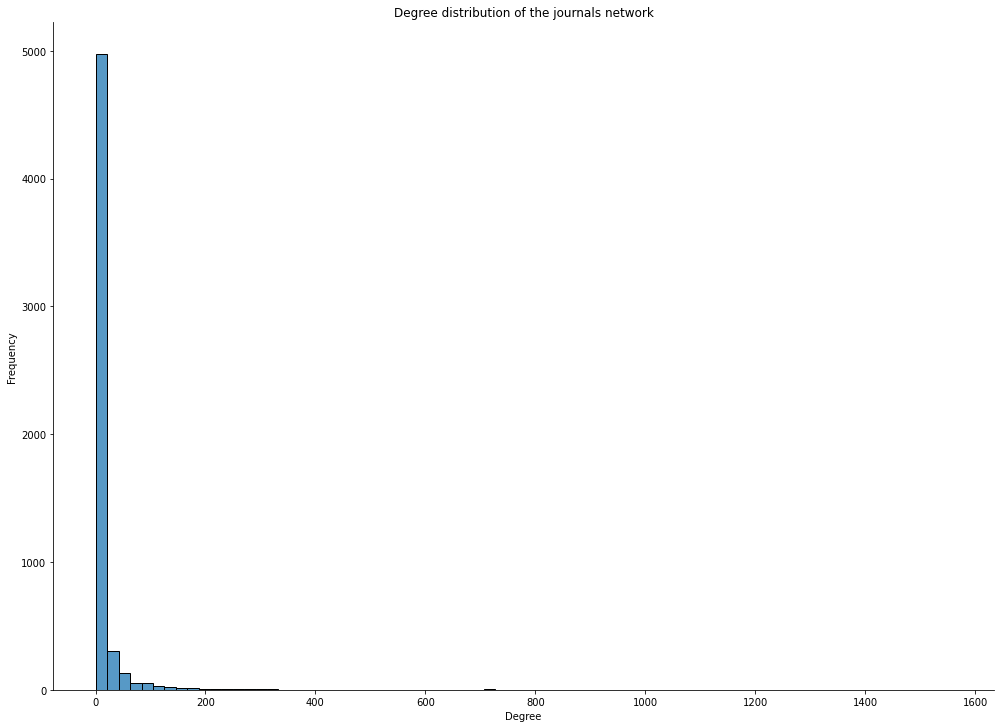

In [41]:
dist_viz = sns.displot(ddist_df['degree'], height=10, aspect=7/5, bins=75)
dist_viz.set(xlabel='Degree', ylabel='Frequency', title='Degree distribution of the journals network')
dist_viz

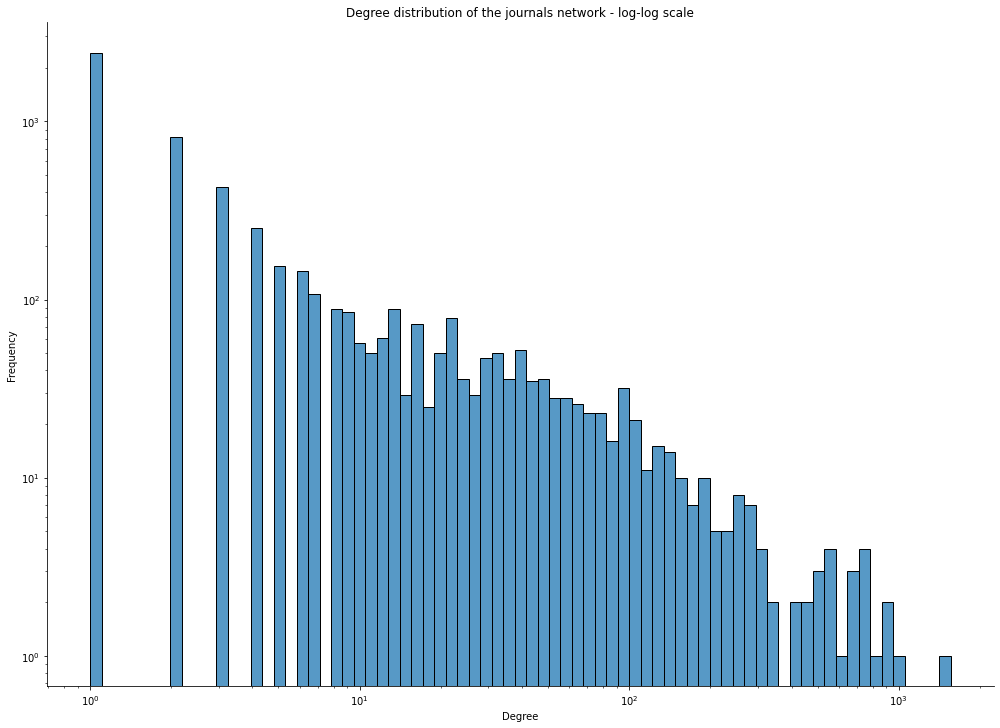

In [42]:
dist_viz = sns.displot(ddist_df['degree'], height=10, aspect=7/5, bins=75, log_scale=(True, True))
dist_viz.set(xlabel='Degree', ylabel='Frequency', title='Degree distribution of the journals network - log-log scale')
dist_viz

#### Computing the scaling coefficient
To be sure that our conclusions are not based on biased visual interpretations, we measure how close our distribution is to a power law distribution by compute the scaling coefficient $\alpha$ as follows:

$$\alpha=1+n(\sum_i ln \frac{d_i}{d_{min}-1/2})^{-1}$$

Where:
- $n$ is the number of nodes in our network.
- $d_i$ is the degree of the node $i$.
- $d_{min}$ is the minimum degree found in our graph.

Finding an $\alpha$ value such that $2 \le \alpha \le 3$ means that our network is a scale free newtork.

In [57]:
sum_fa = 0

for degree in degree_distribution_list:
    sum_fa += log(degree/(1-1/2)) # compute the sum of the log of the degrees divided by the minimum degree in our netwrork (1) - 1/2


alpha_sc = 1+len(degree_distribution_list)*(sum_fa)**-1 # compute alpha
print("alpha = ", alpha_sc)

alpha =  1.5434686393381751


We can conclude that the nodes' degree of our network do not follow a power law distribution, therefore our network cannot be said to be scale-free.

## Modularity coefficient

It is between 0 and 1.

Compute $Q$, that is the modularity coefficient.